In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
crime_data = np.loadtxt(open("../data/crimeData.csv", "rb"), delimiter=",", skiprows=1)
crime_target = np.loadtxt(open("../data/crimeLabels.csv", "rb"), delimiter=",", dtype=str)

print(crime_data.shape, crime_target.shape, end="\n")

(4653, 3) (4653,)


In [43]:
from sklearn.cross_validation import train_test_split, cross_val_score
crime_X_train, crime_X_test, crime_y_train, crime_y_test = train_test_split(crime_data, crime_target)

print(crime_X_train.shape, crime_y_train.shape, crime_X_test.shape, crime_y_test.shape, end='\n')

(3489, 3) (3489,) (1164, 3) (1164,)


In [48]:
from sklearn.svm import LinearSVC
from sklearn import metrics
crime_clf = LinearSVC().fit(crime_X_train, crime_y_train)

#print(metrics.f1_score(crime_clf.predict(crime_X_test), crime_y_test, average="weighted"))
crime_clf.score(crime_X_test, crime_y_test)

0.080756013745704472

ValueError: X has 2 features per sample; expecting 3

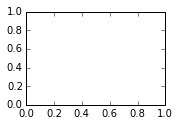

In [50]:
# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
#C = 1.0  # SVM regularization parameter
#svc = svm.SVC(kernel='linear', C=C).fit(X, y)
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = crime_data[:, 0].min() - 1, crime_data[:, 0].max() + 1
y_min, y_max = crime_data[:, 1].min() - 1, crime_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = [#'SVC with linear kernel',
          'LinearSVC (linear kernel)']
          #'SVC with RBF kernel',
          #'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((crime_clf,)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Time of day')
    plt.ylabel('Latitude')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()